In [1]:
!python --version

Python 3.7.12


In [3]:
# install Tensorflow version 2.11.0 (latest)
# !pip install --upgrade -q pip
# !pip install --upgrade -q tensorflow==2.11.0

In [4]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [5]:
# Clone the tensorflow models repository if it doesn't already exist
import os
import pathlib

if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 4401, done.
remote: Counting objects: 100% (4401/4401), done.
remote: Compressing objects: 100% (3220/3220), done.
remote: Total 4401 (delta 1187), reused 3076 (delta 1105), pack-reused 0 (from 0)
Receiving objects: 100% (4401/4401), 70.05 MiB | 40.64 MiB/s, done.
Resolving deltas: 100% (1187/1187), done.


In [6]:
# install COCO for evaluating the model after training it
# !pip install -q cython
# !pip install -q pycocotools

In [6]:
cd /kaggle/working/

/kaggle/working


In [7]:
%%bash
cd /kaggle/working/models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install -q .

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.12.2 requires cupy-cuda115, which is not installed.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
pathos 0.3.0 requires dill>=0.3.6, but you have dill 0.3.1.1 which is incompatible.
onnx 1.13.1 requires protobuf<4,>=3.20.2, but you have protobuf 3.19.6 which is incompatible.
multiprocess 0.70.14 requires dill>=0.3.6, but you have dill 0.3.1.1 which is incompatible.
distributed 2021.11.2 requires dask==2021.11.2, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21

In [9]:
!pip uninstall -y protobuf
!pip install protobuf==3.20.*
# and restart or try 2 times

Found existing installation: protobuf 3.19.6
Uninstalling protobuf-3.19.6:
  Successfully uninstalled protobuf-3.19.6
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.9 MB/s eta 0:00:00 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 21.12.2 requires cupy-cuda115, which is not installed.
tfx-bsl 1.12.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.79.0 which is incompatible.
tfx-bsl 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-transform 1.12.0 requires pyarrow<7,>=6, but you have pyarrow 5.0.0 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboardx 2.5.1 requi

In [10]:
#run model builder test
!python /kaggle/working/models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.12: /opt/conda/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
/opt/conda/lib/python3.7/site-packages/object_detection/builders/model_builder.py:1112: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Building experimental DeepMAC meta-arch.'
W0112 06:50:40.796175 137526023976768 model_builder.py:1112] Building experimental DeepMAC meta-arch. Some features may be omitted.
I0112 06:50:41.127501 137526023976768 test_util.py:2458] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 4.81s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
I0112 06:50:41.988213 137526023976768 test_util.py:2458] time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.86s
[       OK ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_

In [11]:
train_record_path = '/kaggle/input/circuit/Circuit Recognition.v1i.tfrecord/train/Predict-circuit-parameters.tfrecord'
valid_record_path = '/kaggle/input/circuit/Circuit Recognition.v1i.tfrecord/valid/Predict-circuit-parameters.tfrecord'
labelmap_path = '/kaggle/input/circuit/Circuit Recognition.v1i.tfrecord/train/Predict-circuit-parameters_label_map.pbtxt'

In [21]:
batch_size = 16
num_steps = 1657
num_eval_steps = 25
num_classes = 6

In [14]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d0_coco17_tpu-32.tar.gz

--2026-01-12 07:33:29--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.145.207, 74.125.69.207, 108.177.121.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.145.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M   172MB/s    in 0.2s    

2026-01-12 07:33:29 (172 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [15]:
fine_tune_checkpoint = '/kaggle/working/efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0'

In [63]:
#!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config

base_config_path = '/kaggle/working/ssd_efficientdet_d0_512x512_coco17_tpu-8.config'

In [65]:
# edit configuration file
import re

with open(base_config_path) as f:
    config = f.read()

with open('model_config.config', 'w') as f:
  
  # Set labelmap path
  config = re.sub('label_map_path: ".*?"', 
             'label_map_path: "{}"'.format(labelmap_path), config)
  
  # Set fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)
  
  # Set train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 
                  'input_path: "{}"'.format(train_record_path), config)
  
  # Set test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 
                  'input_path: "{}"'.format(valid_record_path), config)
  
  # Set number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: {}'.format(num_classes), config)
  
  # Set batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)
  
  # Set training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)
  
  # Set fine-tune checkpoint type to detection
  config = re.sub('fine_tune_checkpoint_type: "classification"', 
             'fine_tune_checkpoint_type: "{}"'.format('detection'), config)
  
  f.write(config)

In [66]:
%cat /kaggle/working/model_config.config

 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 6
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      m

In [67]:
def get_pipeline_config(path):
    pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
    with tf.io.gfile.GFile(path, 'r') as f:
        text_format.Merge(f.read(), pipeline_config)

    return pipeline_config

def save_pipeline_config(pipeline_config, path):
    config_text = text_format.MessageToString(pipeline_config)
    with tf.io.gfile.GFile(path, "wb") as f:
        f.write(config_text)

In [68]:
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [69]:
pipeline_config_path = '/kaggle/working/model_config.config'
pipeline_config = get_pipeline_config(pipeline_config_path)

In [70]:
pipeline_config.eval_config.batch_size = 1

In [73]:
pipeline_config.model.ssd.post_processing.batch_non_max_suppression.max_detections_per_class = 10
pipeline_config.model.ssd.post_processing.batch_non_max_suppression.max_total_detections = 10

In [75]:
save_pipeline_config(pipeline_config, '/kaggle/working/model_config.config')

In [76]:
%cat /kaggle/working/model_config.config

model {
  ssd {
    num_classes: 6
    image_resizer {
      keep_aspect_ratio_resizer {
        min_dimension: 512
        max_dimension: 512
        pad_to_max_dimension: true
      }
    }
    feature_extractor {
      type: "ssd_efficientnet-b0_bifpn_keras"
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 4e-05
          }
        }
        initializer {
          truncated_normal_initializer {
            mean: 0.0
            stddev: 0.03
          }
        }
        activation: SWISH
        batch_norm {
          decay: 0.99
          scale: true
          epsilon: 0.001
        }
        force_use_bias: true
      }
      bifpn {
        min_level: 3
        max_level: 7
        num_iterations: 3
        num_filters: 64
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        m

In [26]:
!mkdir training

In [27]:
model_dir = '/kaggle/working/training/'
pipeline_config_path = '/kaggle/working/model_config.config'

In [28]:
!python /kaggle/working/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

I0112 08:07:25.577240 131974091159360 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')
I0112 08:07:25.582540 131974091159360 config_util.py:552] Maybe overwriting train_steps: 1657
I0112 08:07:25.582731 131974091159360 config_util.py:552] Maybe overwriting use_bfloat16: False
I0112 08:07:25.607634 131974091159360 ssd_efficientnet_bifpn_feature_extractor.py:162] EfficientDet EfficientNet backbone version: efficientnet-b0
I0112 08:07:25.607824 131974091159360 ssd_efficientnet_bifpn_feature_extractor.py:163] EfficientDet BiFPN num filters: 64
I0112 08:07:25.607951 131974091159360 ssd_efficientnet_bifpn_feature_extractor.py:165] EfficientDet BiFPN num iterations: 3
I0112 08:07:25.612529 131974091159360 efficientnet_model.py:143] round_filter input=32 output=32
I0112 08:07:25.660042 131974091159360 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then 

In [77]:
# %load_ext tensorboard
# %tensorboard --logdir '/kaggle/working/training/train'

In [32]:
!mkdir inference_graph

In [34]:
output_directory = '/kaggle/working/inference_graph'

!python /kaggle/working/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}

I0112 08:29:55.958926 134270788695872 ssd_efficientnet_bifpn_feature_extractor.py:162] EfficientDet EfficientNet backbone version: efficientnet-b0
I0112 08:29:55.959211 134270788695872 ssd_efficientnet_bifpn_feature_extractor.py:163] EfficientDet BiFPN num filters: 64
I0112 08:29:55.959354 134270788695872 ssd_efficientnet_bifpn_feature_extractor.py:165] EfficientDet BiFPN num iterations: 3
I0112 08:29:55.964984 134270788695872 efficientnet_model.py:143] round_filter input=32 output=32
I0112 08:29:56.005895 134270788695872 efficientnet_model.py:143] round_filter input=32 output=32
I0112 08:29:56.006114 134270788695872 efficientnet_model.py:143] round_filter input=16 output=16
I0112 08:29:56.092510 134270788695872 efficientnet_model.py:143] round_filter input=16 output=16
I0112 08:29:56.092735 134270788695872 efficientnet_model.py:143] round_filter input=24 output=24
I0112 08:29:56.307932 134270788695872 efficientnet_model.py:143] round_filter input=24 output=24
I0112 08:29:56.308178 134

In [ ]:
# can download(f'/kaggle/working/inference_graph/saved_model/saved_model.pb') 

In [35]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [36]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [37]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)

In [38]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/kaggle/working/inference_graph/saved_model')

In [39]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

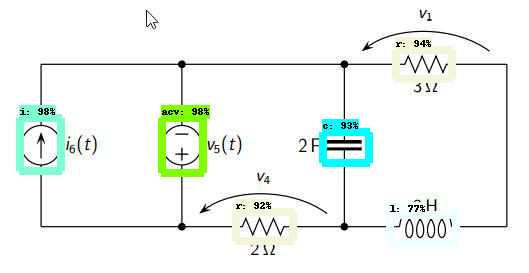

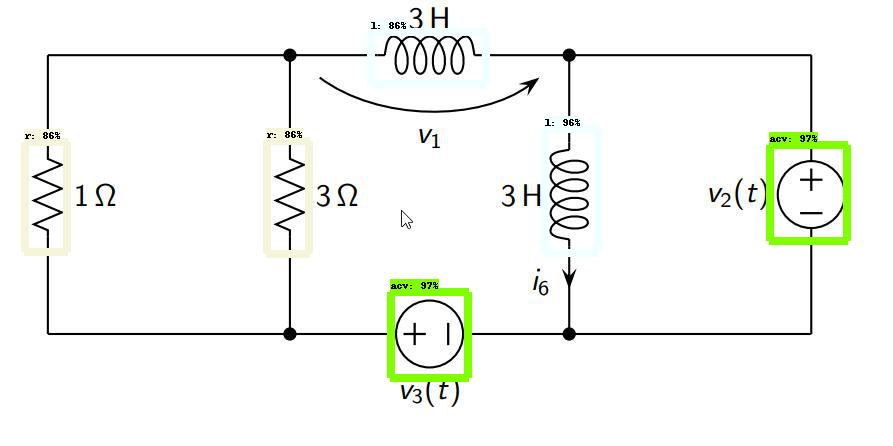

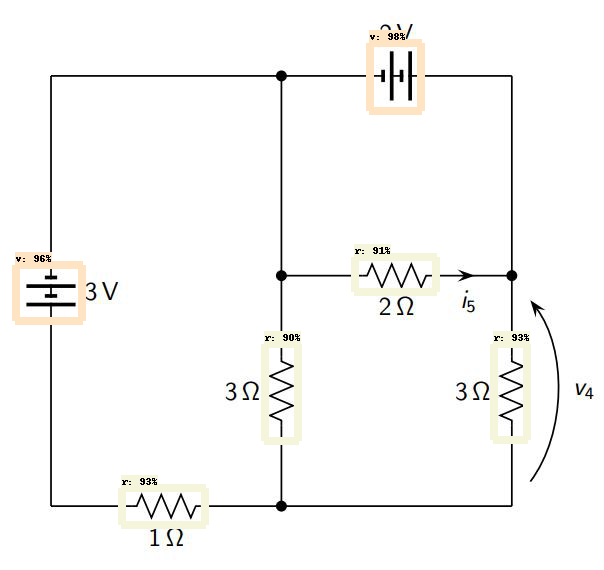

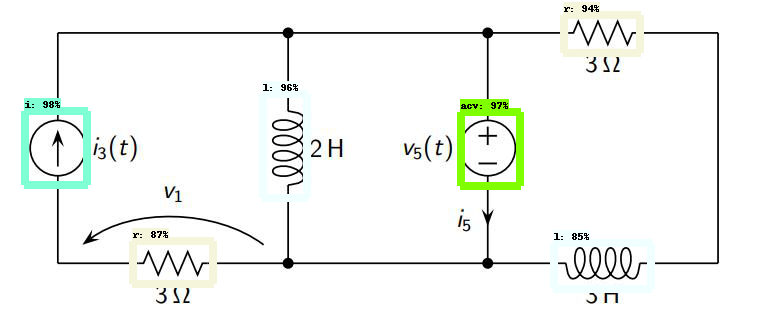

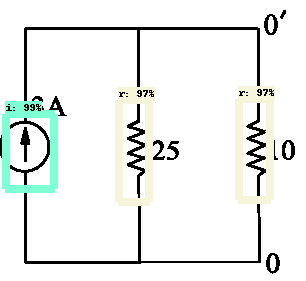

In [40]:
a = 0
for image_path in glob.glob('/kaggle/input/circuit-test/valid/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))
  a += 1
  if a == 5:
      break

In [ ]:
!zip -r /kaggle/working/TFODfiles.zip /kaggle/working/

In [81]:
!rm /kaggle/working/TFODfiles.zip

In [87]:
# !virtualenv -p python3 venv
# !source venv/bin/activate

In [89]:
# !pip install tensorflowjs[wizard]

In [90]:
# !tensorflowjs_wizard

In [91]:
# Convert to TFLite. This form of quantization is called
# post-training dynamic-range quantization in TFLite.
converter = tf.lite.TFLiteConverter.from_saved_model("/kaggle/working/inference_graph/saved_model")

# Enable TF Select ops for unsupported operations
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,
    tf.lite.OpsSet.SELECT_TF_OPS # Enable TF Select ops
]

# No optimizations
tflite_model = converter.convert()
open("circuit_TFOD_EfficientDet.tflite", "wb").write(tflite_model)

23041360

TFLite outputs types and shapes:
  Output type=<class 'numpy.ndarray'>, shape=(1, 49104, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1,)
  Output type=<class 'numpy.ndarray'>, shape=(1, 49104, 6)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 6)
TFLite outputs types and shapes:
  Output type=<class 'numpy.ndarray'>, shape=(1, 49104, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1,)
  Output type=<class 'numpy.ndarray'>, shape=(1, 49104, 6)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 4)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100)
  Output type=<class 'numpy.ndarray'>, shape=(1, 100, 6)
TFLite outputs types and shapes:
  Output type

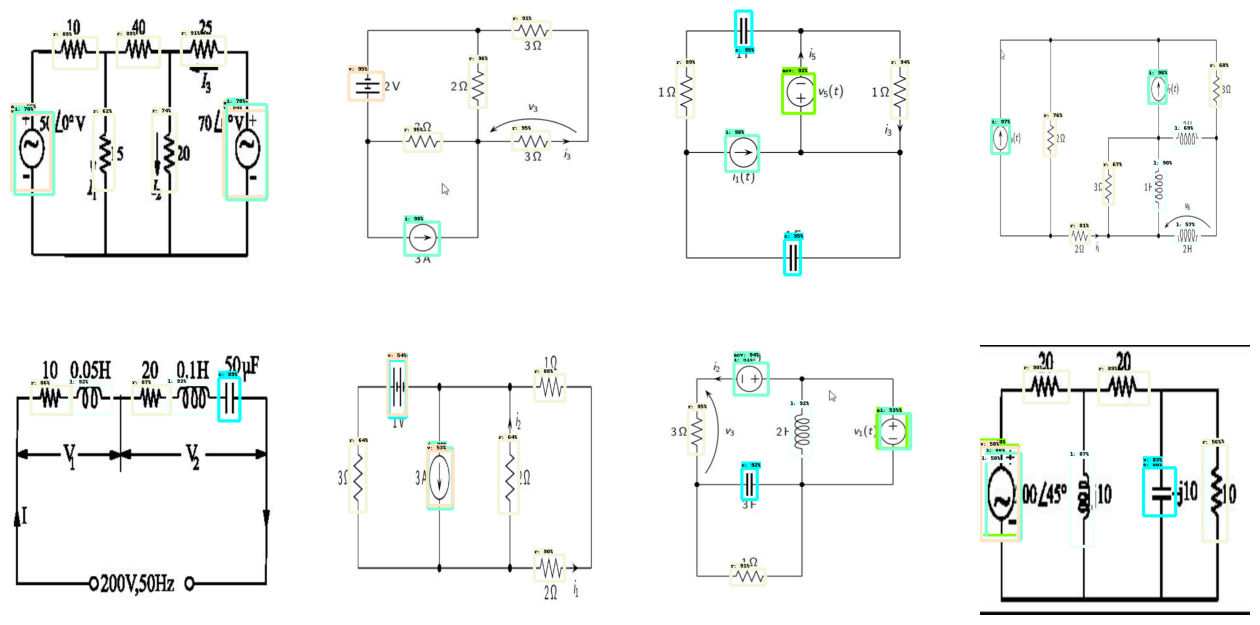

In [98]:
import os, random, cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ---------------- CONFIG ----------------
val_dir = "/kaggle/input/circuit-test/valid"

min_score_thresh = 0.5
# visualization layout
N = 8
cols = 4
rows = int(np.ceil(N / cols))

# ---- MODEL DIMENSIONS FOR TFLITE INFERENCE ----
MODEL_H = 512   # TFLite model input height
MODEL_W = 512   # TFLite model input width

# ---------- LOAD TFLITE ----------
interpreter = tf.lite.Interpreter(
    model_path="/kaggle/working/circuit_TFOD_EfficientDet.tflite"
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# ---- FIX MODEL INPUT SHAPE (ONCE) ----
interpreter.resize_tensor_input(
    input_details[0]["index"],
    [1, MODEL_H, MODEL_W, 3],
    strict=True
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# random image selection
all_imgs = [os.path.join(val_dir, f)
            for f in os.listdir(val_dir)
            if f.lower().endswith((".jpg", ".png", ".jpeg"))]

sample_imgs = random.sample(all_imgs, N)

# load images
raw_images = []
orig_images = []

for p in sample_imgs:
    img = cv2.imread(p)
    orig_images.append(img.copy())
    raw_images.append(np.array(img))

plt.figure(figsize=(4 * cols, 4 * rows))

for i, image in enumerate(raw_images):
    plt.subplot(2, 4, i+1)
    input_image = cv2.resize(image, (512, 512))
    image_np = input_image.copy()
    input_image = input_image[:,:,::-1]
    input_image = np.expand_dims(input_image, 0)

    input_data = (input_image).astype(np.uint8)
    interpreter.set_tensor(input_details[0]["index"], input_data)

    # run inference
    interpreter.invoke()

    # get outputs
    tflite_outputs = []
    print("TFLite outputs types and shapes:")
    for out_detail in output_details:
        output_tensor = interpreter.get_tensor(out_detail["index"])
        tflite_outputs.append(output_tensor)
        print(f"  Output type={type(output_tensor)}, shape={output_tensor.shape}")
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        tflite_outputs[4][0],
        tflite_outputs[5][0].astype(int),
        tflite_outputs[6][0],
        category_index=category_index,
        use_normalized_coordinates=True,
        max_boxes_to_draw=20,
        min_score_thresh=min_score_thresh,
        agnostic_mode=False,
        instance_masks=None,
        line_thickness=6)
    plt.imshow(image_np)
    plt.axis('off')

plt.show()

In [134]:
def class_wise_nms(
    boxes, scores,
    score_thresh=0.5,
    iou_thresh=0.45,
    max_detections_per_class=20
):
    final_boxes, final_classes, final_scores = [], [], []
    num_classes = scores.shape[1]

    for cls in range(1, num_classes):
        cls_scores = scores[:, cls]
        keep = cls_scores >= score_thresh
        if not np.any(keep):
            continue

        cls_boxes = boxes[keep]
        cls_scores = cls_scores[keep]

        selected = tf.image.non_max_suppression(
            cls_boxes,
            cls_scores,
            max_output_size=max_detections_per_class,
            iou_threshold=iou_thresh
        ).numpy()

        final_boxes.append(cls_boxes[selected])
        final_scores.append(cls_scores[selected])
        final_classes.append(
            np.full(len(selected), cls, dtype=np.int32)
        )

    if not final_boxes:
        return np.empty((0,4)), np.empty((0,)), np.empty((0,))

    return (
        np.concatenate(final_boxes),
        np.concatenate(final_classes),
        np.concatenate(final_scores)
    )

In [135]:
def global_nms(
    boxes, classes, scores,
    iou_thresh=0.5,
    max_detections=50
):
    selected = tf.image.non_max_suppression(
        boxes,
        scores,
        max_output_size=max_detections,
        iou_threshold=iou_thresh
    ).numpy()

    return (
        boxes[selected],
        classes[selected],
        scores[selected]
    )

In [136]:
def draw_labels_cv2(image, boxes, classes, scores, category_index,
                    font_scale=0.9, thickness=2):
    h, w, _ = image.shape

    for box, cls, score in zip(boxes, classes, scores):
        ymin, xmin, ymax, xmax = box
        x1, y1 = int(xmin * w), int(ymin * h)
        x2, y2 = int(xmax * w), int(ymax * h)

        if cls == 0 or cls not in category_index:
            continue

        label = f"{category_index[cls]['name']}: {score:.2f}"

        (tw, th), _ = cv2.getTextSize(
            label, cv2.FONT_HERSHEY_SIMPLEX,
            font_scale, thickness
        )

        cv2.rectangle(image,
                      (x1, y1 - th - 6),
                      (x1 + tw + 4, y1),
                      (0, 0, 0), -1)

        cv2.putText(
            image, label,
            (x1 + 2, y1 - 4),
            cv2.FONT_HERSHEY_SIMPLEX,
            font_scale,
            (255, 255, 255),
            thickness,
            cv2.LINE_AA
        )

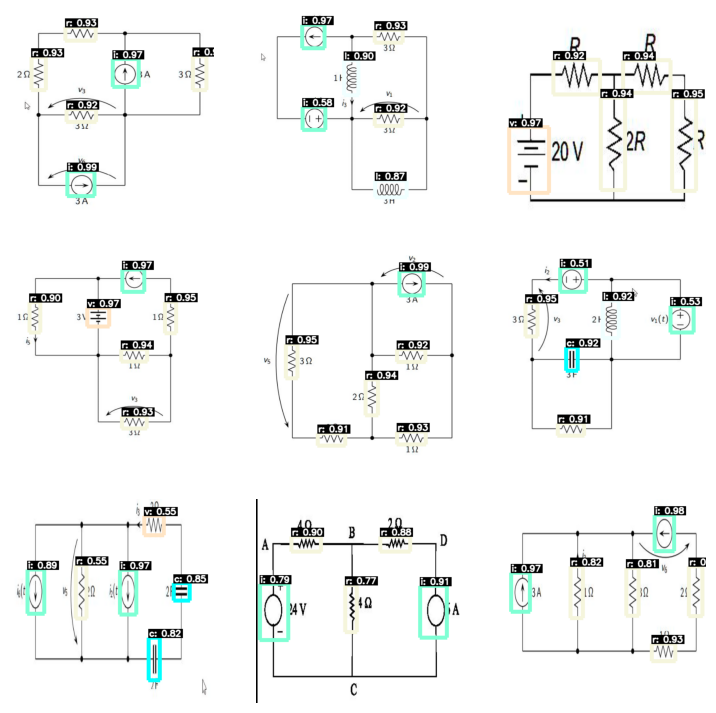

In [138]:
import os, random, cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ---------------- CONFIG ----------------
val_dir = "/kaggle/input/circuit-test/valid"

min_score_thresh = 0.5
# visualization layout
N = 9
cols = 3
rows = int(np.ceil(N / cols))

# ---- MODEL DIMENSIONS FOR TFLITE INFERENCE ----
MODEL_H = 512   # TFLite model input height
MODEL_W = 512   # TFLite model input width

# ---------- LOAD TFLITE ----------
interpreter = tf.lite.Interpreter(
    model_path="/kaggle/working/circuit_TFOD_EfficientDet.tflite"
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# ---- FIX MODEL INPUT SHAPE (ONCE) ----
interpreter.resize_tensor_input(
    input_details[0]["index"],
    [1, MODEL_H, MODEL_W, 3],
    strict=True
)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# random image selection
all_imgs = [os.path.join(val_dir, f)
            for f in os.listdir(val_dir)
            if f.lower().endswith((".jpg", ".png", ".jpeg"))]

sample_imgs = random.sample(all_imgs, N)

# load images
raw_images = []
orig_images = []

for p in sample_imgs:
    img = cv2.imread(p)
    orig_images.append(img.copy())
    raw_images.append(np.array(img))

plt.figure(figsize=(3 * cols, 3 * rows))

for i, image in enumerate(raw_images):
    plt.subplot(3, 3, i+1)

    input_image = cv2.resize(image, (512, 512))
    image_np = input_image.copy()

    # BGR → RGB
    input_image = input_image[:, :, ::-1]
    input_image = np.expand_dims(input_image, 0).astype(np.uint8)

    interpreter.set_tensor(input_details[0]["index"], input_image)
    interpreter.invoke()

    # -------- get TFLite outputs --------
    tflite_outputs = [
        interpreter.get_tensor(o["index"]) for o in output_details
    ]

    # RAW outputs (before NMS)
    raw_boxes  = tflite_outputs[0][0]   # (49104, 4)
    raw_scores = tflite_outputs[3][0]   # (49104, num_classes)

    # -------- CUSTOM NMS --------
    boxes, classes, scores = class_wise_nms(
        raw_boxes,
        raw_scores,
        score_thresh=min_score_thresh,
        iou_thresh=0.3,
        max_detections_per_class=10
    )

    boxes, classes, scores = global_nms(
        boxes,
        classes,
        scores,
        iou_thresh=0.3,
        max_detections=10
    )

    # 🔥 FIX: TF returns 0-based class IDs
    classes = classes + 1

    # -------- visualize --------
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        boxes,
        classes,
        scores,
        category_index=category_index,
        use_normalized_coordinates=True,
        min_score_thresh=min_score_thresh,
        skip_labels=True,
        skip_scores=True,
        line_thickness=10
    )

    # draw big labels
    draw_labels_cv2(
        image_np,
        boxes,
        classes,
        scores,
        category_index,
        font_scale=0.7,
        thickness=2
    )

    plt.imshow(image_np)
    plt.axis("off")

plt.show()

---